# Harmonic Oscillator QNM

Schrödinger equation: $ -\dfrac{d^2\phi}{dx^2} + (x^2-E)\phi = 0 $

We are interested in eigenstates with out-going boundary conditions at both $x \rightarrow \pm \infty$, since this captures the effect of propagation in a non-trivial potential, and seen only once the initial excitation reaches the barrier and gets reflected.

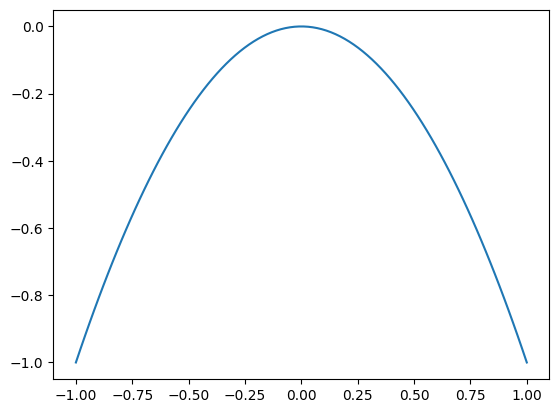

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#HARMONIC OSCILLATOR POTENTIAL
def V(x):

    return -x**2

x = np.linspace(-1,1,100)
plt.plot(x,V(x))
plt.show()

QNM's defined as solutions of the perturbed field equations with boundary conditions (ingoing waves at the horizon, outgoing waves at infinity): \
\
$\psi(x) \rightarrow e^{-i\omega x} \text{ as } x \rightarrow -\infty$ \
$\psi(x) \rightarrow e^{+i\omega x} \text{ as } x \rightarrow +\infty$